This notebook was inspired by Dayan and Abbott Chapter 1 Exercises 
https://www.gatsby.ucl.ac.uk/~dayan/book/exercises/c1/c1.pdf

The algorithm for generating Poisson numbers is well explained here:
https://www.tu-chemnitz.de/informatik/KI/scripts/ws0910/Neuron_Poisson.pdf


In [44]:
def generate_poisson(rate=100,dt=0.001,T=10):
    spike_vec=[]
    for time_p in range(int(T/dt)):
        rand_n=np.random.uniform(0,1,1).item()
        if rate*dt>rand_n:
            spike_vec.append(1)
        else:
            spike_vec.append(0)
    return np.array(spike_vec)

In [70]:
spike_vec_1ms=generate_poisson()

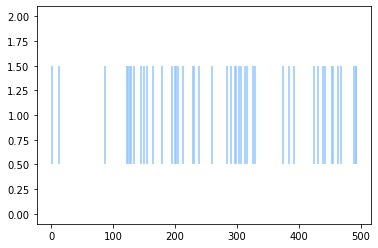

In [71]:
#plot spike raster
plt.eventplot(np.nonzero(spike_vec_1ms[0:500])[0],animated=True)

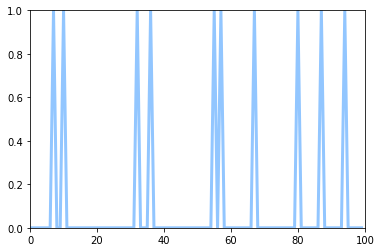

In [90]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(0, 1))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x=np.arange(0,100)
    y = spike_vec_1ms[i*100:(i+1)*100]
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)


anim.save('spikes.gif', writer='imagemagick')

In [91]:
from IPython.display import Image
Image(url='spikes.gif')  